### 练习1-癌症分类预测

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [3]:
# 1.获取数据
names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
         'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 
         'Mitoses', 'Class']
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=names)
#names = names,原始数据集是没有列名的 ,因此使用我们定义的字符串列表来指定
data.head()#699*11的数据集
data.shape

(699, 11)

In [4]:
# 2.基本数据处理
# 2.1 加载数据时指定特殊缺失值
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=names,na_values='?')
# 处理缺失值
data = data.dropna()#删除行,变成了683*11的数据集
# 2.2 确定特征值,目标值
x = data.iloc[:, 1:10]
x.head()
y = data["Class"]
y.head()
# 2.3 分割数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)#默认text_size = 0.25


In [5]:
# 3.特征工程(标准化)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
#fit_transform是先学习标准化参数,然后转换x_train
x_test = transfer.transform(x_test)
#transform只进行转换,使用已经学习得出的参数
#这两个都是配合使用,用于标准化整个数据集.这样训练和测试数据都被标准化到同一空间下,更方便模型学习和预测。

In [6]:
# 4.机器学习(逻辑回归)
estimator = LogisticRegression()
estimator.fit(x_train, y_train)

LogisticRegression()

In [7]:
# 5.模型评估
y_predict = estimator.predict(x_test)
estimator.score(x_test, y_test)#得到模型在测试集上的准确率
#当对于癌症病人预测,我们并不关注预测的准确率，而是关注在所有的样本当中，癌症患者有没有被全部预测（检测）出来

0.9766081871345029

### 练习2-电信客户流失

In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#%matplotlib 是Jupyter notebook/lab专用的matplotlib配置命令.inline模式可以将matplotlib画图命令产生的图直接显示在notebook中相应的单元格里
#1. 导入数据,查看数据的基本信息
churn=pd.read_csv('data/churn.csv')
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Partner_att        7043 non-null   int64  
 3   Dependents_att     7043 non-null   int64  
 4   landline           7043 non-null   int64  
 5   internet_att       7043 non-null   int64  
 6   internet_other     7043 non-null   int64  
 7   StreamingTV        7043 non-null   int64  
 8   StreamingMovies    7043 non-null   int64  
 9   Contract_Month     7043 non-null   int64  
 10  Contract_1YR       7043 non-null   int64  
 11  PaymentBank        7043 non-null   int64  
 12  PaymentCreditcard  7043 non-null   int64  
 13  PaymentElectronic  7043 non-null   int64  
 14  MonthlyCharges     7043 non-null   float64
 15  TotalCharges       7043 non-null   float64
dtypes: float64(2), int64(12)

In [18]:
### 数据集介绍
# AT&T数据，用户个人，通话，上网等信息数据
# 充分利用数据预测客户的流失情况
# 帮助挽留用户，保证用户基数和活跃程度
# 具体数据说明如下：
# CustomerID 客户ID
# Gender 性别
# partneratt 配偶是否也为att用户
# dependents_att 家人是否也是att用户
# landline 是否使用att固话服务
# internet_att/internet_other 是否使用att的互联网服务
# Paymentbank/creditcard/electroinc 付款方式
# MonthlyCharges 每月话费
# TotalCharges 累计话费
# Contract_month/1year 用户使用月度/年度合约
# StreamingTv/streamingMovies 是否使用在线视频或者电影app
# Churn 客户转化的flag

In [19]:
#预测目标是churn，是类别型变量  gender也是类别型变量 需要对类别型变量进行处理
churn.head()


,Churn,gender,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
0,No,Female,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85
1,No,Male,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50
2,Yes,Male,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15
3,No,Male,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75
4,Yes,Female,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65


In [20]:
churn=pd.get_dummies(churn)
#因为机器学习无法处理类别变量,我们需要将分类特征转化为指定的(0/1)二值化格式,产生的新特征数目等于原始特征中唯一值的个数
churn.head()



,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,1,0,1,0
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,1,0,0,1
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,0,1,0,1
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,0,1,1,0


In [21]:
#处理数据,讲将churn_yes保留，将female保留,drop不需要的数据.这一步是为了防止多重共线性
churn.drop(['Churn_No','gender_Male'],axis=1,inplace=True)#axis=1删除列
#变量大小写不规则，统一变成小写
churn.columns=churn.columns.str.lower()
churn.head()


,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,churn_yes,gender_female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,1,1


In [22]:
#将churn_yes重命名
churn=churn.rename(columns={'churn_yes':'flag'})
#二分类模型，分析flag 1和0的占比
churn.flag.value_counts()#统计一下总体订阅用户的人数

0    5174
1    1869
Name: flag, dtype: int64

In [15]:
churn.flag.value_counts(1)#流失的用户占比0.73

0    0.73463
1    0.26537
Name: flag, dtype: float64

In [16]:
summary=churn.groupby('flag')#按照是否流失分组
summary.mean()


,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,gender_female
flag,,,,,,,,,,,,,,,
0,0.528218,0.344801,0.901044,0.379204,0.347700,0.365868,0.369927,0.429068,0.252609,0.248550,0.249324,0.250097,61.265124,2545.918081,0.492656
1,0.357945,0.174425,0.909042,0.245586,0.693954,0.435527,0.437667,0.885500,0.088818,0.138042,0.124131,0.573034,74.441332,1528.514714,0.502408


观察flag在0和1的情况下，所有自变量的差别 internet_other变量，在0的分组中，均值是0.35，在1的分组中，均值是0.69。数据显示如果使用别的公司的互联网，用户流失的概率就越高

<Axes: xlabel='count', ylabel='contract_month'>

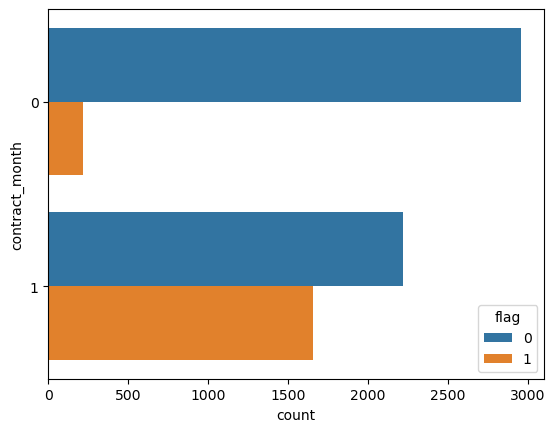

In [24]:
sns.countplot(y='contract_month',hue='flag',data=churn)
#研究单个指标用户使用月度/年度合约,可以发现如果用户使用的月度付款的方式(contract_month = 1),则流失程度更高一些.这提示我们如果要营销,可以花更多时间在月度付费客户的营销上面

In [25]:
#建立逻辑回归模型
# 确定目标值和特征值
#我们想根据'contract_month','internet_other','streamingtv'三个指标来预测客户流失的几率
y=churn['flag']
x=churn[['contract_month','internet_other','streamingtv']]

In [26]:
#调用sklearn模块，随机抽取训练集与测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
#使用sklearn
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
#模型的评估
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
import sklearn.metrics as metrics
metrics.accuracy_score(y_train,y_pred_train)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test)
#auc表示roc曲线下的面积,越接近于1越好
#从这个结果来看的话,我们的model预测效果一般,并且Y标签的类别分布上看，未流失用户为：5174 流失用户为：1869，属于样本分布不均衡问题，我们可以通过调整逻辑回归的模型参数来为占比较低的类别增加权重

0.7006333927971842

In [38]:
#改进模型
#调整LogisticRegression(class_weight='balanced'),进一步通过网格搜索来调整其它参数
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
kfold = StratifiedKFold(n_splits=5, shuffle=True)#shuffle: 是否在分层之前洗牌,默认为False。这里设置为True,表示先洗牌后分层。
lr = linear_model.LogisticRegression()
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100],'class_weight':['balanced']}
#solver: 逻辑回归的优化算法,有newton-cg、lbfgs、liblinear等
#C: L2正则化力度的反,值越大正则化越弱
search = GridSearchCV(lr, param_grid, cv=kfold)
lr = search.fit(x_train, y_train)


LogisticRegression 模型中的solver参数提供了几种不同的算法来优化逻辑回归的损失函数。
其中主要的区别为:
newton-cg: 使用牛顿法优化,速度快,但占用内存大。适用于小数据集。
lbfgs: 使用L-BFGS算法优化,稍慢但占用内存少。适用于大数据集。
liblinear: 使用Coordinate Descent算法优化,速度快,占用内存小,但只支持L1和L2正则化。
sag: 使用随机平均梯度下降,速度快,但占用内存大。
saga: 使用改进的随机平均梯度下降,收敛更可靠。
总结一下:
小数据集:newton-cg收敛最快
大数据集:lbfgs占用内存少,liblinear支持L1正则化
需要快速收敛:sag和saga
优先考虑内存占用:lbfgs和liblinear
目标函数较复杂:newton-cg收敛较好
所以选择solver需要根据数据集大小、正则化类型和优化目标来决定。一般lbfgs或liblinear会更通用。

In [40]:
lr.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'solver': 'newton-cg'}

In [44]:
# 从GridSearchCV中取出最优模型
best_lr = lr.best_estimator_
# 查看模型系数
#x=churn[['contract_month','internet_other','streamingtv']]
best_lr.coef_
#此处我们只是对原模型进行的优化,但并没有修改一开始选择的特征,但是这三个特征并不一定是建模的最优解
#从这个结果上来看,0.43的权重最大,0.30也还行,因此我们要更侧重对月付费用户以及使用它网宽带的用户做针对性的营销


array([[0.43084708, 0.30875988, 0.04746181]])